In [1]:
#Karan Veer Singh
#Internship Task 1
#Cognifyz Tech 

import pandas as pd, numpy as np; import matplotlib.pyplot as plt
df=pd.read_csv('Dataset .csv'); print('shape:',df.shape); print('cols:',list(df.columns)); df.dtypes

shape: (9551, 21)
cols: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [2]:
numCols=df.select_dtypes(include=[np.number]).columns.tolist(); catCols=[c for c in df.columns if c not in numCols]
print('numeric cols:',numCols); print('categorical cols:',catCols)
for c in ['Aggregate rating','Votes','Average Cost for two','Price range']:
    if c in df.columns: df[c]=pd.to_numeric(df[c],errors='coerce')
for c in ['Has Table booking','Has Online delivery','City','Cuisines']:
    if c in df.columns: df[c]=df[c].astype(str)
df['Price range']=df.get('Price range',pd.Series(index=df.index,dtype='float64')).astype('float64')
df.dtypes

numeric cols: ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
categorical cols: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range             float64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [3]:
miss=df.isna().sum().sort_values(ascending=False); print('missing counts:\n',miss.head(20))
if 'City' in df: df['City']=df['City'].fillna('Unknown City')
if 'Cuisines' in df: df['Cuisines']=df['Cuisines'].fillna('Unknown')
for c in ['Votes','Average Cost for two','Price range']:
    if c in df.columns: df[c]=df[c].fillna(df[c].median())
if 'Aggregate rating' in df: df['Aggregate rating']=df['Aggregate rating'].fillna(df['Aggregate rating'].median())
print('post-impute missing (top):\n',df.isna().sum().sort_values(ascending=False).head(10))

missing counts:
 Restaurant ID           0
Currency                0
Rating text             0
Rating color            0
Aggregate rating        0
Price range             0
Switch to order menu    0
Is delivering now       0
Has Online delivery     0
Has Table booking       0
Average Cost for two    0
Restaurant Name         0
Cuisines                0
Latitude                0
Longitude               0
Locality Verbose        0
Locality                0
Address                 0
City                    0
Country Code            0
dtype: int64
post-impute missing (top):
 Restaurant ID           0
Currency                0
Rating text             0
Rating color            0
Aggregate rating        0
Price range             0
Switch to order menu    0
Is delivering now       0
Has Online delivery     0
Has Table booking       0
dtype: int64


In [7]:
tb=df.get('Has Table booking',pd.Series(index=df.index,dtype='object'))
od=df.get('Has Online delivery',pd.Series(index=df.index,dtype='object'))
tb_counts=tb.value_counts(); od_counts=od.value_counts()
tb_pct=(tb_counts/tb_counts.sum()*100).round(2); od_pct=(od_counts/od_counts.sum()*100).round(2)
print('table booking counts:\n',tb_counts,'\n%:\n',tb_pct)
print('\nonline delivery counts:\n',od_counts,'\n%:\n',od_pct)
tb_stats=df.groupby(tb)['Aggregate rating'].agg(['mean','median','count']).round(3)
od_stats=df.groupby(od)['Aggregate rating'].agg(['mean','median','count']).round(3)
print('\nrating by table booking:\n',tb_stats)
print('\nrating by online delivery:\n',od_stats)

table booking counts:
 Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64 
%:
 Has Table booking
No     87.88
Yes    12.12
Name: count, dtype: float64

online delivery counts:
 Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64 
%:
 Has Online delivery
No     74.34
Yes    25.66
Name: count, dtype: float64

rating by table booking:
                     mean  median  count
Has Table booking                      
No                 2.559     3.1   8393
Yes                3.442     3.6   1158

rating by online delivery:
                       mean  median  count
Has Online delivery                      
No                   2.465     3.1   7100
Yes                  3.249     3.4   2451


online delivery by price range (%):
 Has Online delivery     No    Yes
Price range                      
1.0                  84.23  15.77
2.0                  58.69  41.31
3.0                  70.81  29.19
4.0                  90.96   9.04

counts:
 Has Online delivery    No   Yes
Price range                    
1.0                  3743   701
2.0                  1827  1286
3.0                   997   411
4.0                   533    53


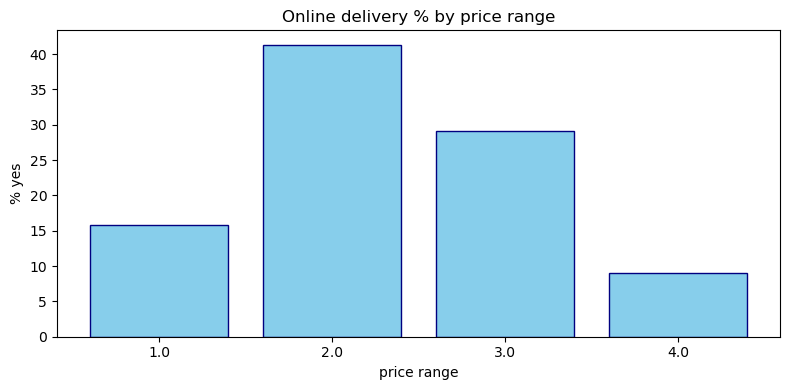

In [8]:
od_price=pd.crosstab(df['Price range'],od,normalize='index')*100
od_price_counts=pd.crosstab(df['Price range'],od)
print('online delivery by price range (%):\n',od_price.round(2))
print('\ncounts:\n',od_price_counts)
plt.figure(figsize=(8,4))
ys=od_price.get('Yes',pd.Series(0,index=od_price.index)).values
xs=np.arange(len(od_price.index)); plt.bar(xs,ys,color='skyblue',edgecolor='navy')
plt.xticks(xs,od_price.index); plt.title('Online delivery % by price range'); plt.xlabel('price range'); plt.ylabel('% yes'); plt.tight_layout(); plt.show()

In [10]:
svc_better=None
if {'Yes','No'}.issubset(set(tb_stats.index)):
    svc_better='Table Booking' if tb_stats.loc['Yes','mean']>tb_stats.loc['No','mean'] else 'No Table Booking'
best_price=None; best_pct=None
if ('Yes' in od_price.columns) and (len(od_price)>0):
    best_price=float(od_price['Yes'].idxmax()); best_pct=float(od_price.loc[best_price,'Yes'])
lines=[]
lines.append(f"rows:{len(df)} | cols:{df.shape}")
if svc_better: lines.append(f"higher avg rating group: {svc_better}")
if best_price is not None: lines.append(f"highest online delivery at price {best_price:.0f} (~{best_pct:.1f}%)")
print('insights'); [print('•',x) for x in lines]

insights
• rows:9551 | cols:(9551, 21)
• higher avg rating group: Table Booking
• highest online delivery at price 2 (~41.3%)


[None, None, None]